In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
a = np.eye(5)
a

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
training_data = np.loadtxt('/content/drive/My Drive/ex1data1.txt',delimiter=',')
X = training_data[:, 0]
y = training_data[:, 1]
m = len(X) # number of training examples


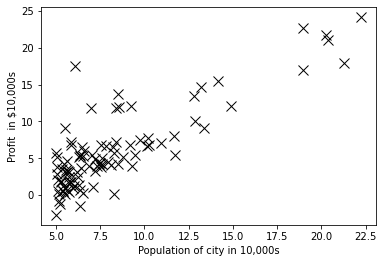

In [0]:
def plotData(x, y):
  """
  Plotting the feature and the target data
  """
  fig = plt.figure()
  plt.xlabel('Population of city in 10,000s')
  plt.ylabel('Profit  in $10,000s')
  plt.plot(x, y, 'rx', ms=10, mec='k')
plotData(X,y)

In [0]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

In [0]:
def computeCost(X,y,theta):
  
  m = len(y)
  J = 0
  training = X[:, 1]
  
  def hypothesis(x,theta_0,theta_1):
    h_x = theta_0 + x*theta_1
    return h_x
  def meanSquareDif(training,feature):
    sum_diff = 0
    for i in range(m):
      h_x = hypothesis(training[i],theta[0],theta[1])
      sum_diff += (h_x - feature[i])**2
    return sum_diff/(2*m)
  J = meanSquareDif(training,y)    
  return J

In [0]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print(J)
J = computeCost(X, y, theta=np.array([-1, 2]))
print(J)

32.072733877455654
54.24245508201238


In [0]:
def gradientDescent(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  J_history = []
  training = X[:, 1]
  def meanDif(training,feature):
    sum_diff = 0
    for i in range(m):
      h_x = theta[0] + training[i]*theta[1]
      sum_diff += (h_x - feature[i])
    return sum_diff/m
  def meanDif_1(training,feature):
    sum_diff = 0
    for i in range(m):
      h_x = theta[0] + training[i]*theta[1]
      sum_diff += (h_x - feature[i])*training[i]
    return sum_diff/m
  
  for i in range(num_iters):
    temp_0 = theta[0] - alpha*meanDif(training,y)
    temp_1 = theta[1] - alpha*meanDif_1(training,y)
    theta[0] = temp_0
    theta[1] = temp_1
    J_history.append(computeCost(X,y,theta))
  return theta,J_history

In [0]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.009

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: -3.5477, 1.1581


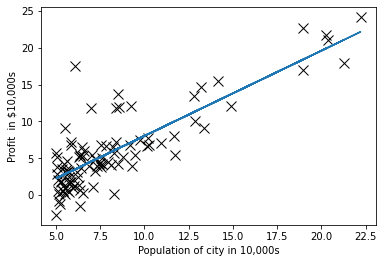

In [0]:
plotData(X[:, 1],y)
plt.plot(X[:, 1], np.dot(X, theta), '-')

In [0]:
predict1 = np.dot([1,3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

For population = 35,000, we predict a profit of 5055.27



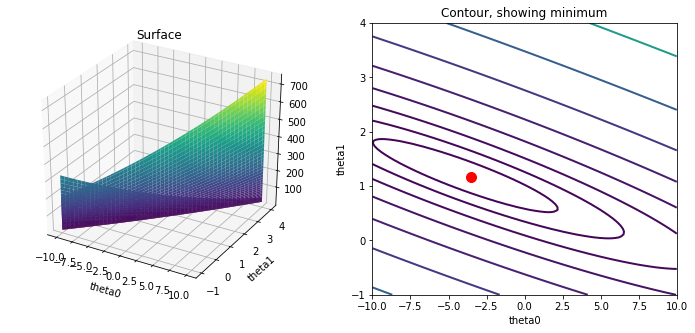

In [0]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass

In [0]:
# starting optinal part
multi_training = np.loadtxt('/content/drive/My Drive/ex1data2.txt',delimiter=',')
feature = multi_training[:,:2]
target = multi_training[:, 2]
m = target.size # number of training examples

In [0]:
def featureNormalize(X):
  X_norm = X.copy() # creating a copy of the original array
  mean = np.zeros((X.shape)[1])
  std_deviation = np.zeros((X.shape)[1])
  
  for i in range(mean.size):
    mean[i] = np.mean(X[:,i])
    std_deviation[i] = np.std(X[:,i])
    X_norm[:,i] = (X[:,i] - mean[i])/(std_deviation[i])
  X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
  return X_norm, mean,std_deviation

In [0]:
X_norm, mu, sigma = featureNormalize(feature)
print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [0]:
feature = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(feature.shape[0] == target.shape[0])

True


In [0]:
def computeCostMulti(X, y, theta):
  m = y.shape[0]
  J = 0
  def meanSquare(X,y,theta,m):
    sum_diff = 0
    for i in range(m):
      h_x = np.dot(np.transpose(theta),X[i])
      sum_diff += (h_x - y[i])**2
    return (sum_diff)/(2*m)
  J = meanSquare(X,y,theta,m)
  return J

In [0]:
print(computeCostMulti(feature, target, np.array([338175.9839673109, 103032.12432974475, -202.3252331036905])))

2063782403.6748838


In [0]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  J_history = []
  def meanDiff(X,y,theta,j):
    sum_diff = 0
    for i in range(m):
      h_x = np.dot(np.transpose(theta),X[i])
      sum_diff += (h_x - y[i])*X[i][j]
    return sum_diff/m  
  for i in range(num_iters):
    temp = []
    for j in range(len(theta)):
      temp_j = theta[j] - alpha * meanDiff(X,y,theta,j)
      temp.append(temp_j)
    J_history.append(computeCostMulti(X, y, theta))
    theta = temp
  
  return theta,J_history

theta computed from gradient descent: [338175.9839673109, 103032.12432974475, -202.3252331036905]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $170340574


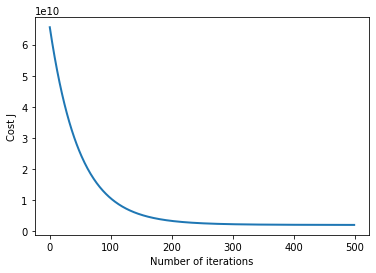

In [0]:
# Choose some alpha value - change this
alpha = 0.01
num_iters = 500

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(feature, target, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
predict = np.dot(np.transpose(theta),np.array([1,1650,3]))
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

price = predict   # You should change this

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))